In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    '자세히',
    '보아야',
    '이쁘다',
    '오래',
    '사랑스럽다',
    '너도',
    '그렇다',
]

data = np.concatenate([
    np.load('dataset/seq_자세히_1670346078.npy'),
    np.load('dataset/seq_보아야_1670346078.npy'),
    np.load('dataset/seq_이쁘다_1670346078.npy'),
    np.load('dataset/seq_오래_1670346078.npy'),
    np.load('dataset/seq_사랑스럽다_1670346078.npy'),
    np.load('dataset/seq_너도_1670346078.npy'),
    np.load('dataset/seq_그렇다._1670346078.npy'),
], axis=0)

data.shape

(7101, 30, 100)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(7101, 30, 99)
(7101,)


In [6]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(7101, 7)

In [7]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(6390, 30, 99) (6390, 7)
(711, 30, 99) (711, 7)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 44,295
Trainable params: 44,295
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
196/200 [============================>.] - ETA: 0s - loss: 35.2609 - acc: 0.3865
Epoch 1: val_acc improved from -inf to 0.55837, saving model to models\model.h5
200/200 [==============================] - 3s 12ms/step - loss: 34.7173 - acc: 0.3894 - val_loss: 5.8899 - val_acc: 0.5584 - lr: 0.0010
Epoch 2/100
196/200 [============================>.] - ETA: 0s - loss: 4.6917 - acc: 0.6505
Epoch 2: val_acc improved from 0.55837 to 0.68354, saving model to models\model.h5
200/200 [==============================] - 2s 10ms/step - loss: 4.6634 - acc: 0.6507 - val_loss: 5.6227 - val_acc: 0.6835 - lr: 0.0010
Epoch 3/100
199/200 [============================>.] - ETA: 0s - loss: 7.1444 - acc: 0.7569
Epoch 3: val_acc improved from 0.68354 to 0.77356, saving model to models\model.h5
200/200 [==============================] - 2s 10ms/step - loss: 7.1287 - acc: 0.7571 - val_loss: 5.1871 - val_acc: 0.7736 - lr: 0.0010
Epoch 4/100
199/200 [============================>.] - ETA: 0s - loss: 

198/200 [============================>.] - ETA: 0s - loss: 1.8643e-04 - acc: 1.0000
Epoch 29: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 10ms/step - loss: 1.8541e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 0.9986 - lr: 0.0010
Epoch 30/100
199/200 [============================>.] - ETA: 0s - loss: 1.6970e-04 - acc: 1.0000
Epoch 30: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 10ms/step - loss: 1.8227e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 0.9986 - lr: 0.0010
Epoch 31/100
199/200 [============================>.] - ETA: 0s - loss: 3.1539e-04 - acc: 1.0000
Epoch 31: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 10ms/step - loss: 3.1437e-04 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000 - lr: 0.0010
Epoch 32/100
199/200 [============================>.] - ETA: 0s - loss: 1.2563e-04 - acc: 1.0000
Epoch 32: val_acc did not improve from 1.00000
200/200 [===========

Epoch 58/100
199/200 [============================>.] - ETA: 0s - loss: 5.0970e-05 - acc: 1.0000
Epoch 58: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 10ms/step - loss: 5.0809e-05 - acc: 1.0000 - val_loss: 1.1398e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 59/100
199/200 [============================>.] - ETA: 0s - loss: 4.5216e-05 - acc: 1.0000
Epoch 59: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 10ms/step - loss: 4.5107e-05 - acc: 1.0000 - val_loss: 1.0227e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 60/100
199/200 [============================>.] - ETA: 0s - loss: 4.0688e-05 - acc: 1.0000
Epoch 60: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 10ms/step - loss: 4.0668e-05 - acc: 1.0000 - val_loss: 6.4063e-05 - val_acc: 1.0000 - lr: 0.0010
Epoch 61/100
199/200 [============================>.] - ETA: 0s - loss: 3.6546e-05 - acc: 1.0000
Epoch 61: val_acc did not improve from 1.0

199/200 [============================>.] - ETA: 0s - loss: 5.3578e-06 - acc: 1.0000
Epoch 86: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 9ms/step - loss: 5.3441e-06 - acc: 1.0000 - val_loss: 1.2289e-05 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 87/100
198/200 [============================>.] - ETA: 0s - loss: 5.1870e-06 - acc: 1.0000
Epoch 87: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 10ms/step - loss: 5.1712e-06 - acc: 1.0000 - val_loss: 9.8210e-06 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 88/100
199/200 [============================>.] - ETA: 0s - loss: 4.6566e-06 - acc: 1.0000
Epoch 88: val_acc did not improve from 1.00000
200/200 [==============================] - 2s 10ms/step - loss: 4.6645e-06 - acc: 1.0000 - val_loss: 7.8327e-06 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 89/100
199/200 [============================>.] - ETA: 0s - loss: 4.2314e-06 - acc: 1.0000
Epoch 89: val_acc did not improve from 1.000

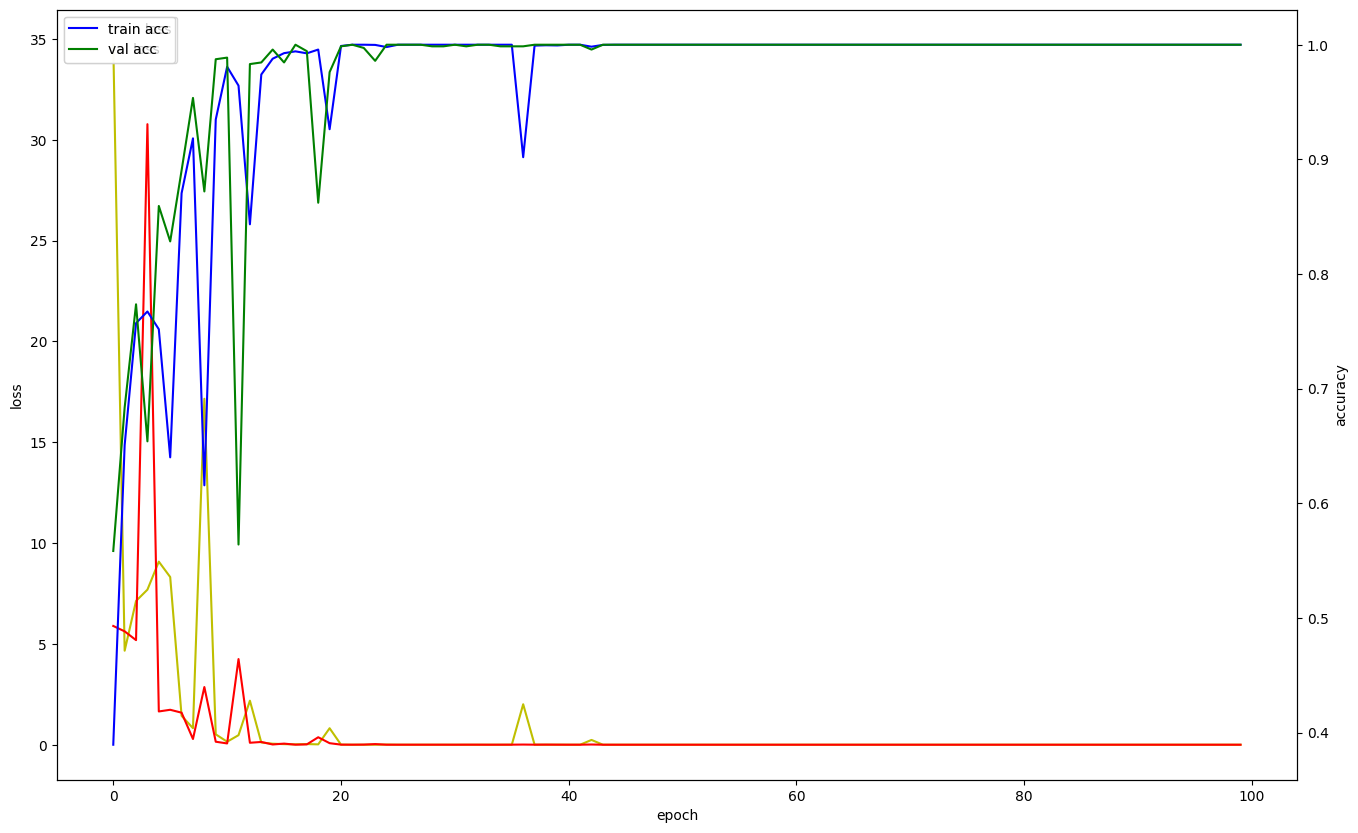

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

23/23 [==============================] - 0s 5ms/step


array([[[583,   0],
        [  0, 128]],

       [[581,   0],
        [  0, 130]],

       [[669,   0],
        [  0,  42]],

       [[581,   0],
        [  0, 130]],

       [[591,   0],
        [  0, 120]],

       [[657,   0],
        [  0,  54]],

       [[604,   0],
        [  0, 107]]], dtype=int64)